# **Guessing Pizza Prices because Who Doesn't Love a Delicious Mystery?** 🍕🕵😄

![](https://i.pinimg.com/originals/af/3c/22/af3c22d9a7d3af0e0a9ee79cb8f91720.jpg)

# FLOW

1. Inputting & Importing
2. Understanding the Data
3. Data Preprocessing
4. Visualisation
5. Categorical Encoding
6. Correlation
7. Splitting data
8. Model Training
9. Model Evaluation and Fine-Tuning
10. Model Deployment and Prediction

# Inputting & Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import accuracy_score

In [2]:
pastel_purple_palette = ["#B19CD9", "#D4A6E0", "#E8C8E6", "#F5E1F7", "#D6BCC0"]
sns.set_palette(pastel_purple_palette)

In [3]:
pizza = pd.read_csv('/kaggle/input/pizza-price-prediction/pizza_v1.csv')

# Understanding the Data

In [4]:
pizza.head(5)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [5]:
pizza.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


In [6]:
pizza.dropna(inplace=True) 
pizza.drop_duplicates(inplace=True)

In [7]:
pizza.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [8]:
pizza.shape

(126, 8)

In [9]:
pizza.dtypes

company          object
price_rupiah     object
diameter        float64
topping          object
variant          object
size             object
extra_sauce      object
extra_cheese     object
dtype: object

In [10]:
pizza.nunique()

company          5
price_rupiah    43
diameter        11
topping         12
variant         20
size             6
extra_sauce      2
extra_cheese     2
dtype: int64

In [11]:
def describefreq(df,col_index):
    col_no = len(df.columns)
    row_no = len(df)
    
    data_types = {}
    for i in range(0,col_no):
        TYPE = type(df.columns[i])
        data_types[i] = TYPE
        
    val_counts = {}
    for i in range(0,col_no):
        if (data_types[i]==str):
            col = df.iloc[:,i]
            col_val_counts = col.value_counts()
            val_counts[i] = col_val_counts
            
            
    return display(pd.DataFrame(val_counts[col_index]))

In [12]:
for i in range(0,len(pizza.columns)):
    describefreq(pizza,i)

,count
company,
C,30
E,28
A,25
B,23
D,20


,count
price_rupiah,
"Rp72,000",11
"Rp90,000",8
"Rp46,000",7
"Rp96,000",5
"Rp49,000",5
"Rp75,000",5
"Rp149,000",4
"Rp140,000",4
"Rp110,000",4


,count
diameter,
12.0,49
14.0,24
8.5,22
17.0,7
18.5,6
16.0,5
8.0,4
16.5,4
22.0,3


,count
topping,
chicken,27
mushrooms,22
mozzarella,20
smoked beef,19
tuna,9
vegetables,9
meat,8
black papper,3
sausage,3


,count
variant,
classic,30
meat_lovers,10
double_mix,10
crunchy,10
double_decker,9
new_york,7
double_signature,5
american_favorite,5
BBQ_meat_fiesta,5


,count
size,
medium,41
small,22
large,21
reguler,20
jumbo,15
XL,7


,count
extra_sauce,
yes,76
no,50


,count
extra_cheese,
yes,83
no,43


# Data Preprocessing

In [13]:
pizza['price_rupiah'] = pizza['price_rupiah'].str.replace('Rp', '') 
pizza['price_rupiah'] = pizza['price_rupiah'].str.replace(',', '')  
pizza['price_rupiah'] = pd.to_numeric(pizza['price_rupiah'], errors='coerce')  

In [14]:
pizza.rename(columns={'price_rupiah': 'price'}, inplace=True)

In [15]:
pizza.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


# Visualization

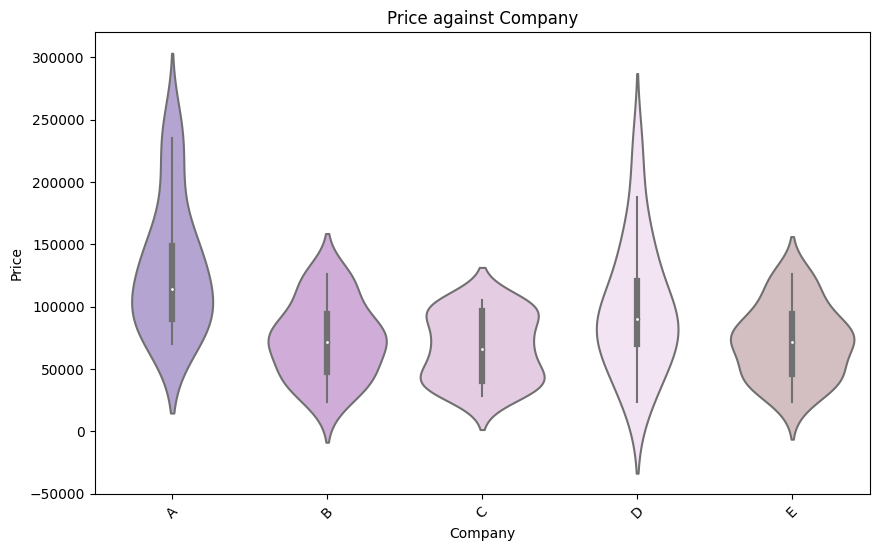

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='company', y='price', data=pizza, palette=pastel_purple_palette)
plt.title('Price against Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

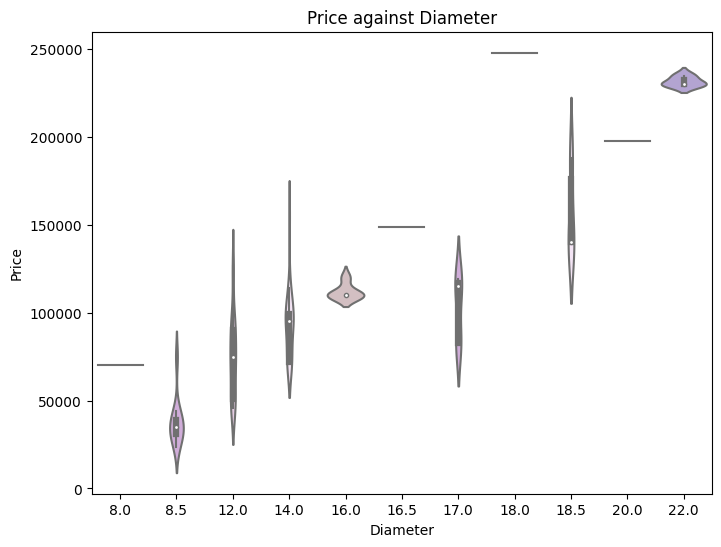

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='diameter', y='price', data=pizza, palette=pastel_purple_palette)
plt.title('Price against Diameter')
plt.xlabel('Diameter')
plt.ylabel('Price')
plt.show()

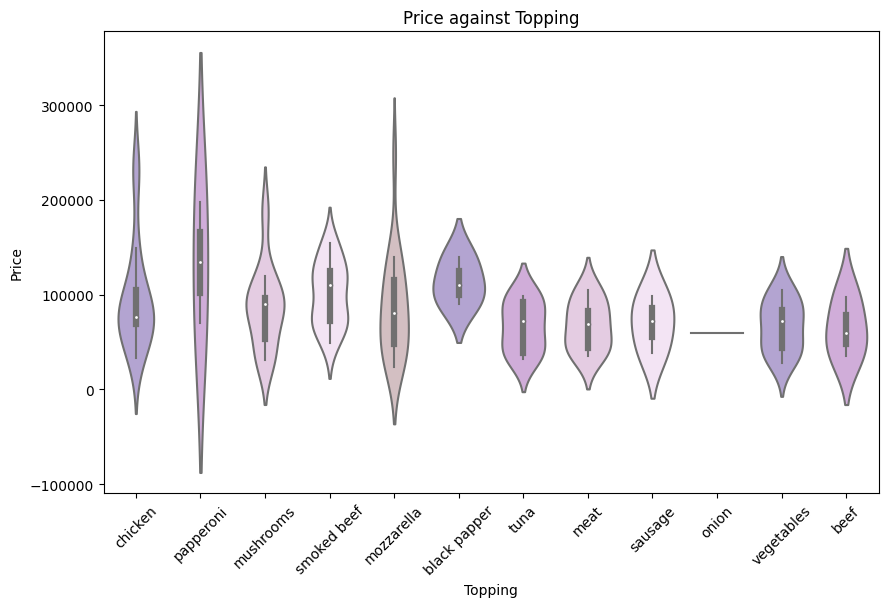

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='topping', y='price', data=pizza, palette=pastel_purple_palette)
plt.title('Price against Topping')
plt.xlabel('Topping')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

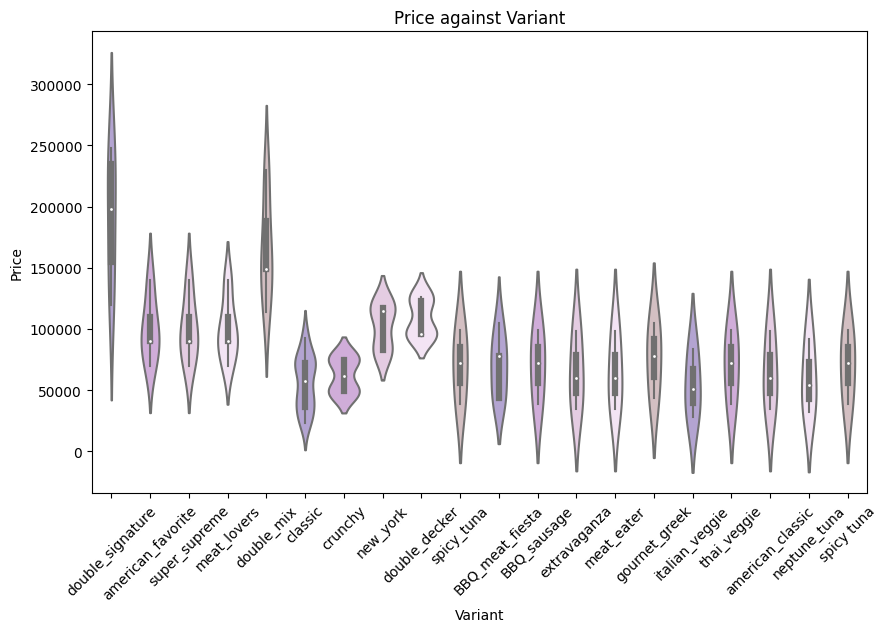

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='variant', y='price', data=pizza, palette=pastel_purple_palette)
plt.title('Price against Variant')
plt.xlabel('Variant')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


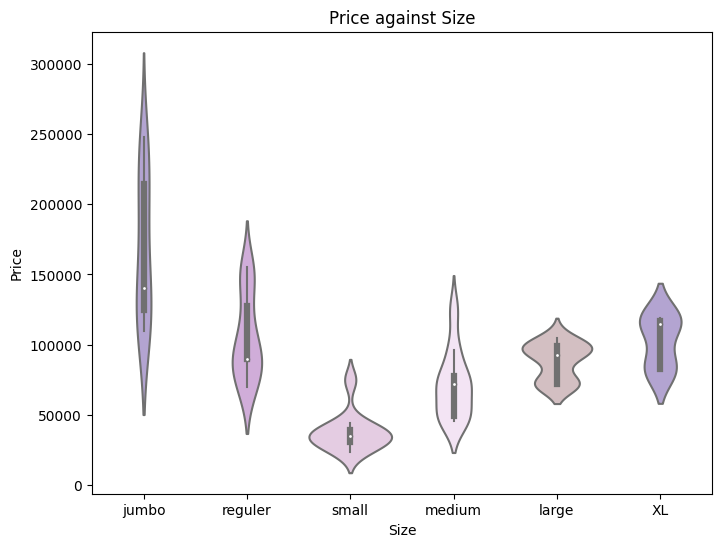

In [20]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='size', y='price', data=pizza, palette=pastel_purple_palette)
plt.title('Price against Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

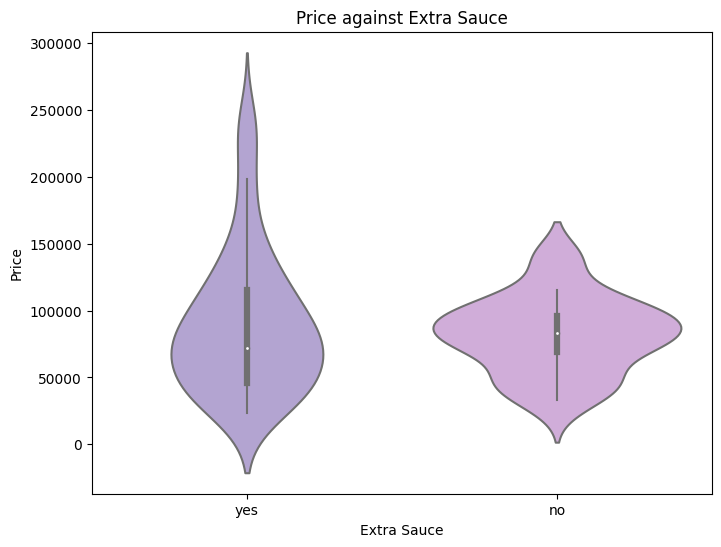

In [21]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='extra_sauce', y='price', data=pizza, palette=pastel_purple_palette)
plt.title('Price against Extra Sauce')
plt.xlabel('Extra Sauce')
plt.ylabel('Price')
plt.show()

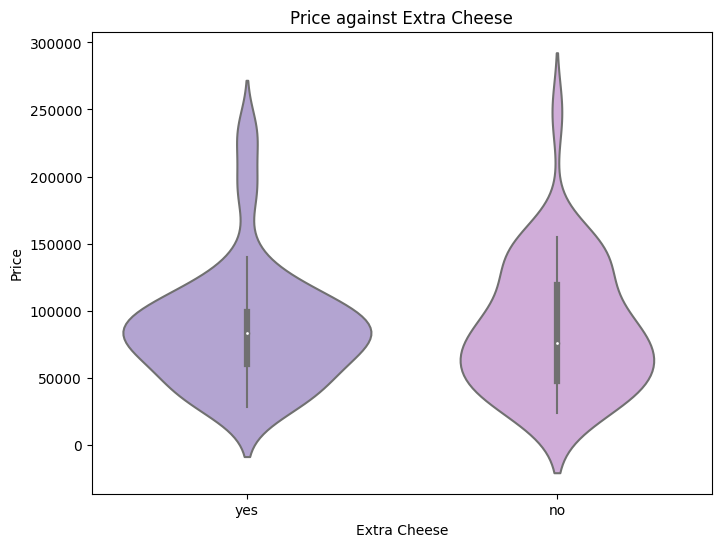

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='extra_cheese', y='price', data=pizza, palette=pastel_purple_palette)
plt.title('Price against Extra Cheese')
plt.xlabel('Extra Cheese')
plt.ylabel('Price')
plt.show()

# Categorical Encoding

In [23]:
encoder = LabelEncoder()

for column in pizza.columns:
    pizza[column] = encoder.fit_transform(pizza[column])

In [24]:
pizza.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,41,10,2,8,1,1,1
1,0,39,9,7,8,1,1,1
2,0,32,4,5,8,4,1,1
3,0,37,3,9,8,4,1,0
4,0,42,7,4,8,1,1,0


# Correlation 

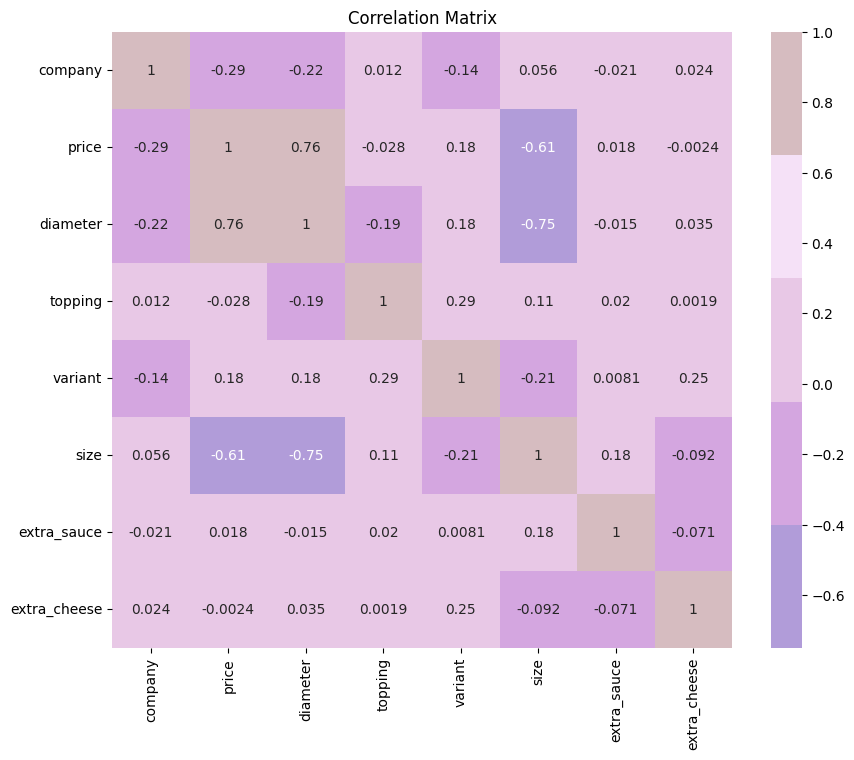

In [25]:
correlation_matrix = pizza.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=pastel_purple_palette)
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

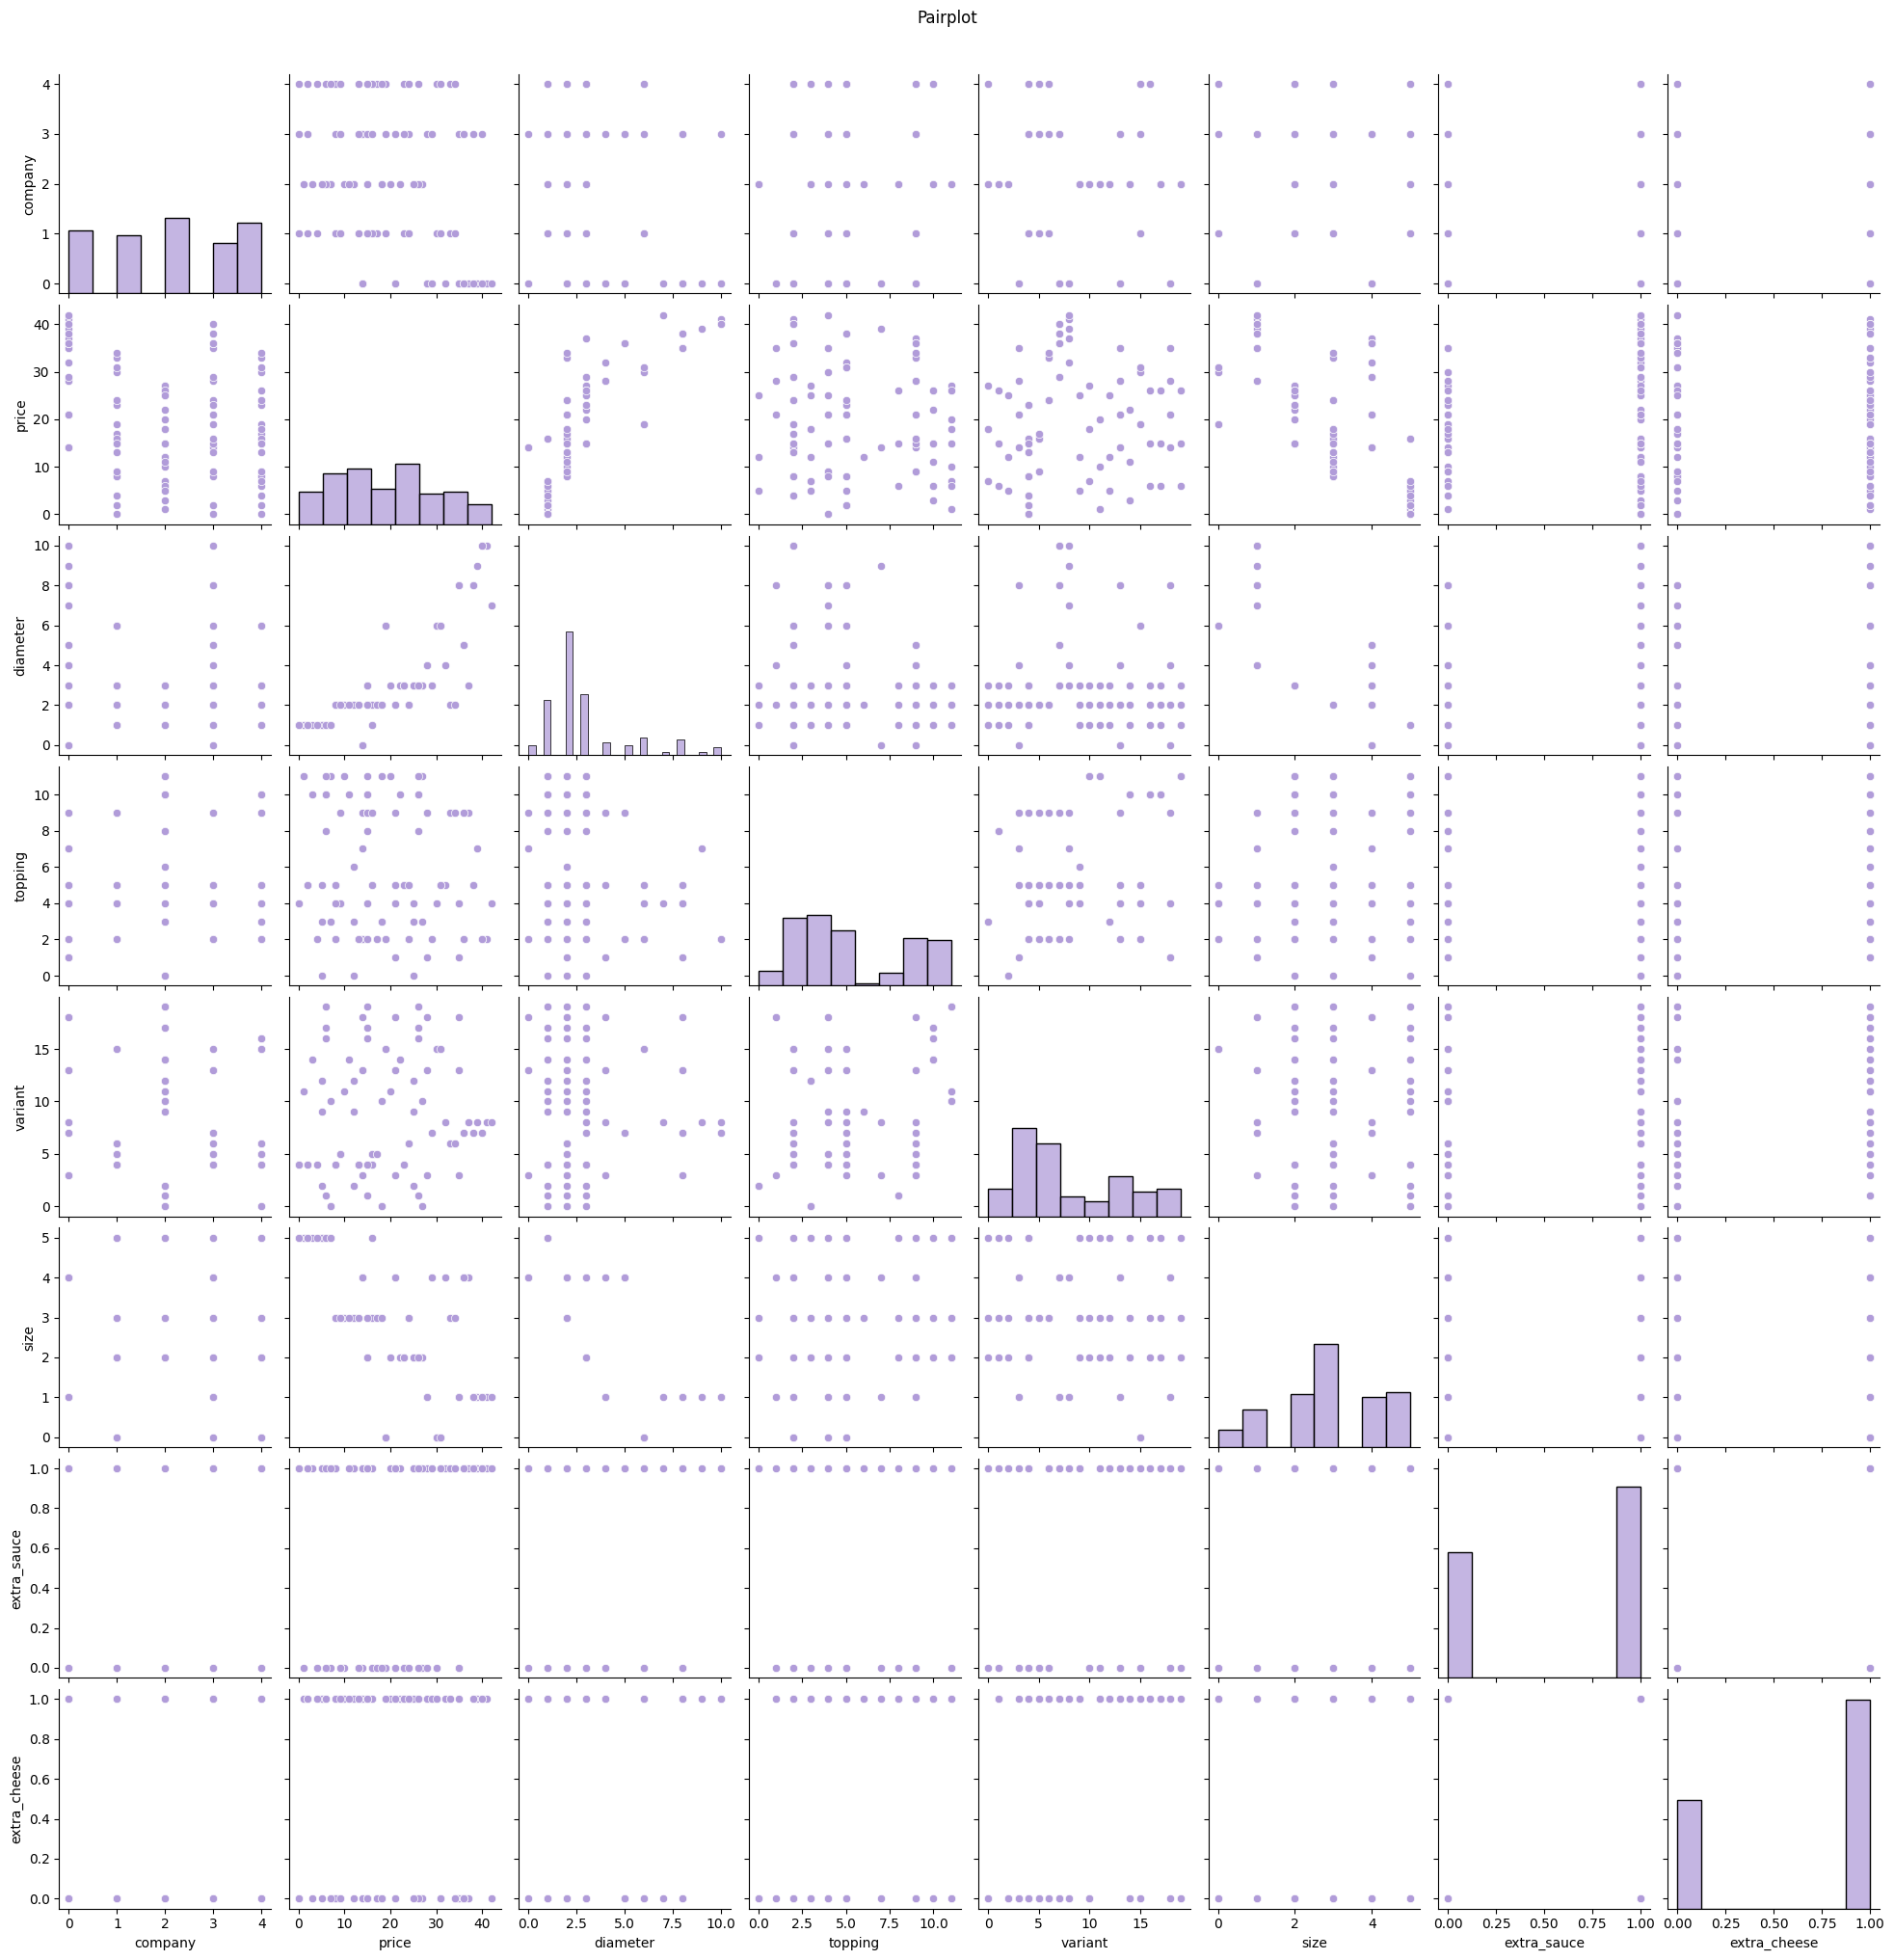

In [26]:
plt.figure(figsize=(10, 6))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot(pizza, palette=pastel_purple_palette)
plt.suptitle('Pairplot', y=1.02)
plt.show()

# Splitting Data

In [27]:
price_column = pizza.pop('price')  
pizza['price'] = price_column 
pizza.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,0,10,2,8,1,1,1,41
1,0,9,7,8,1,1,1,39
2,0,4,5,8,4,1,1,32
3,0,3,9,8,4,1,0,37
4,0,7,4,8,1,1,0,42


In [28]:
X = pizza.iloc[:,:-1]
y = pizza.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_train.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
118,4,1,9,4,5,1,1
13,0,2,1,18,4,0,1
33,1,3,5,4,2,0,1
76,2,1,10,14,5,1,0
26,1,2,2,4,3,1,0


In [30]:
X_test.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
8,0,2,5,3,4,1,0
51,2,3,10,17,2,1,1
43,1,1,9,4,5,1,1
24,0,5,2,7,4,1,0
64,2,1,11,10,5,0,0


# Model Training

In [31]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation and Fine-Tuning

In [32]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)



Mean Squared Error: 10.787753846153846


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [33]:
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(X_train, y_train)

y_pred_tuned = best_rf_regressor.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print("Mean Squared Error (Fine-tuned model):", mse_tuned)

Mean Squared Error (Fine-tuned model): 11.38151002270299


In [34]:
accuracy = r2_score(y_test, y_pred)
print("R-squared Score:", accuracy)

R-squared Score: 0.914783098064878


# Model Performance Plot

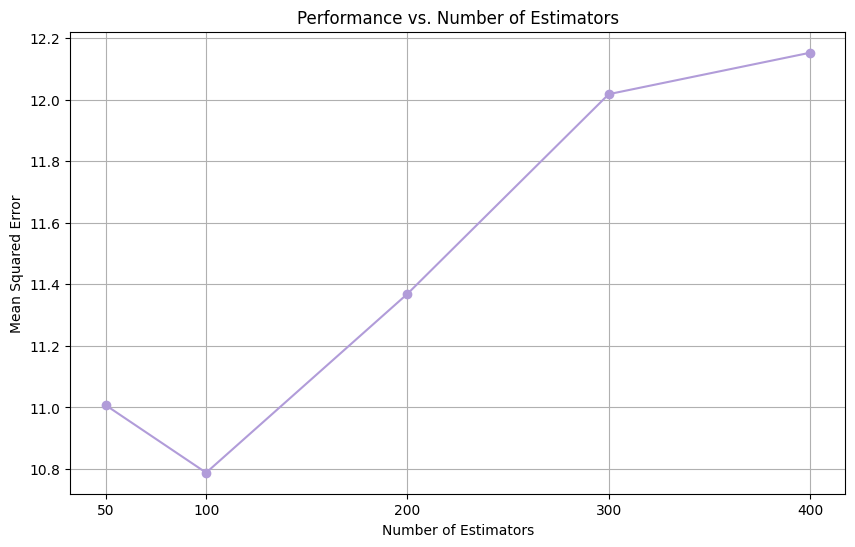

In [35]:
n_estimators_values = [50, 100, 200, 300, 400]
mse_values = []

for n_estimators in n_estimators_values:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mse_values, marker='o')
plt.title('Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.xticks(n_estimators_values)
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

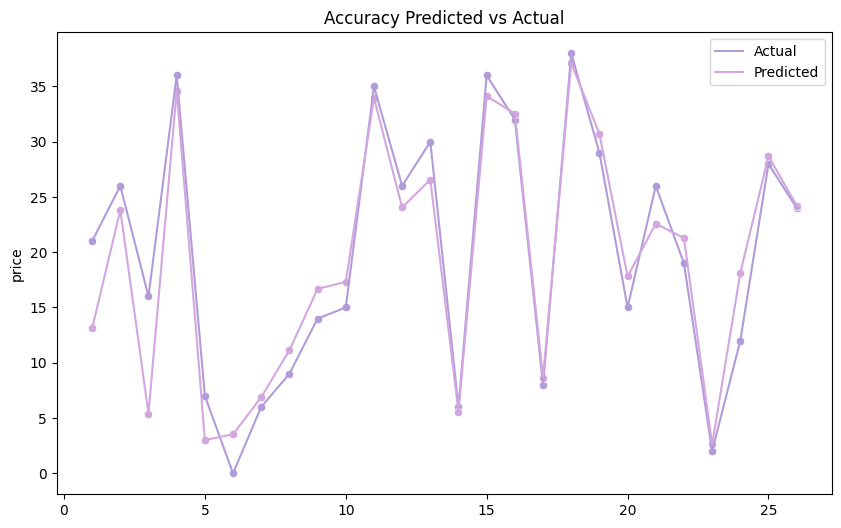

In [36]:
x_axis = [i for i in range(1, len(y_test) + 1)]  

plt.figure(figsize=(10, 6))
sns.lineplot(x=x_axis, y=y_test, color=pastel_purple_palette[0], label='Actual')
sns.scatterplot(x=x_axis, y=y_test, color=pastel_purple_palette[0])
sns.lineplot(x=x_axis, y=y_pred, color=pastel_purple_palette[1], label='Predicted')
sns.scatterplot(x=x_axis, y=y_pred, color=pastel_purple_palette[1])
plt.title('Accuracy Predicted vs Actual')
plt.legend()
plt.show()

In conclusion, this notebook offers a thorough analysis and prediction of pizza prices. It encompasses data preprocessing, visualization, and model training using Random Forest Regression. Evaluation metrics such as Mean Squared Error and R-squared Score indicate the model's accuracy, with an R-squared Score of approximately 90.4%. This demonstrates the effectiveness of the model in predicting pizza prices reliably.

# Hey 💗

> Your time spent exploring this notebook is valued! ˎˊ˗⋆｡°✩📄
> If you've found it insightful and beneficial, please consider giving it an Upvote. Don't hesitate to share your analysis ideas in the comments below. Until next time, happy analyzing!